In [1]:
import json
import pandas as pd
import os

from src.visualize import graph_fmeasure, graph_precision_and_recall
from src.data_loader import load_df

In [2]:
def render_df_from_dict(results_dicts):
    dfs = []
    for res_dict in results_dicts:
        if "rouge_score" in res_dict.keys():
            del res_dict["rouge_score"]
        df = pd.DataFrame.from_dict(res_dict)
        dfs.append(df)
        
    return pd.concat(dfs)

# Explore Results
* RougeL - longest sequence of words that appear in the same order in both model generated summary and reference summary
* Rouge2 - overlap of bigrams in both model generated summary and reference summary
* Rouge3 - overlap of trigrams in both model generated summary and reference summary

In [3]:
results_dicts = []
res_path = "results"
for file in os.listdir(res_path):
    # print(file)
    with open(os.path.join(res_path,file), 'r') as f:
        data = json.load(f)
        
    results_dicts.append(data)
print(len(results_dicts))

5


In [4]:
results_df = render_df_from_dict(results_dicts)

### RougeL
* Longest common subsequence between reference summary and model generated summary

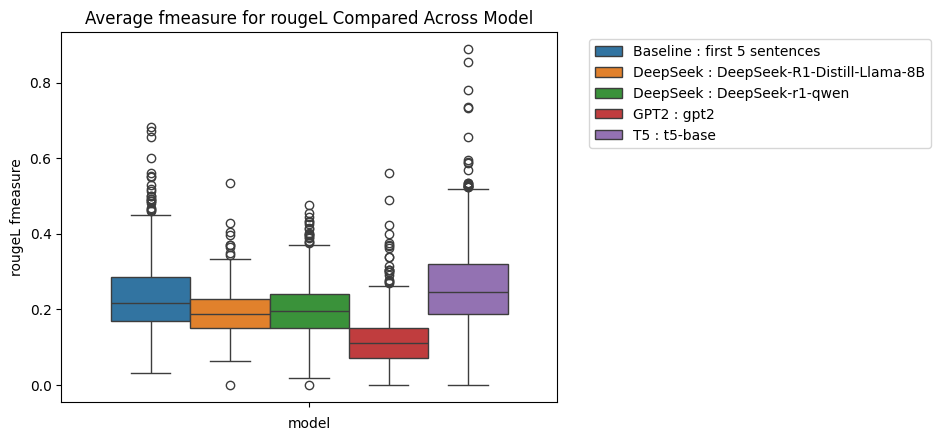

In [5]:
graph_fmeasure(results_df, "rougeL")

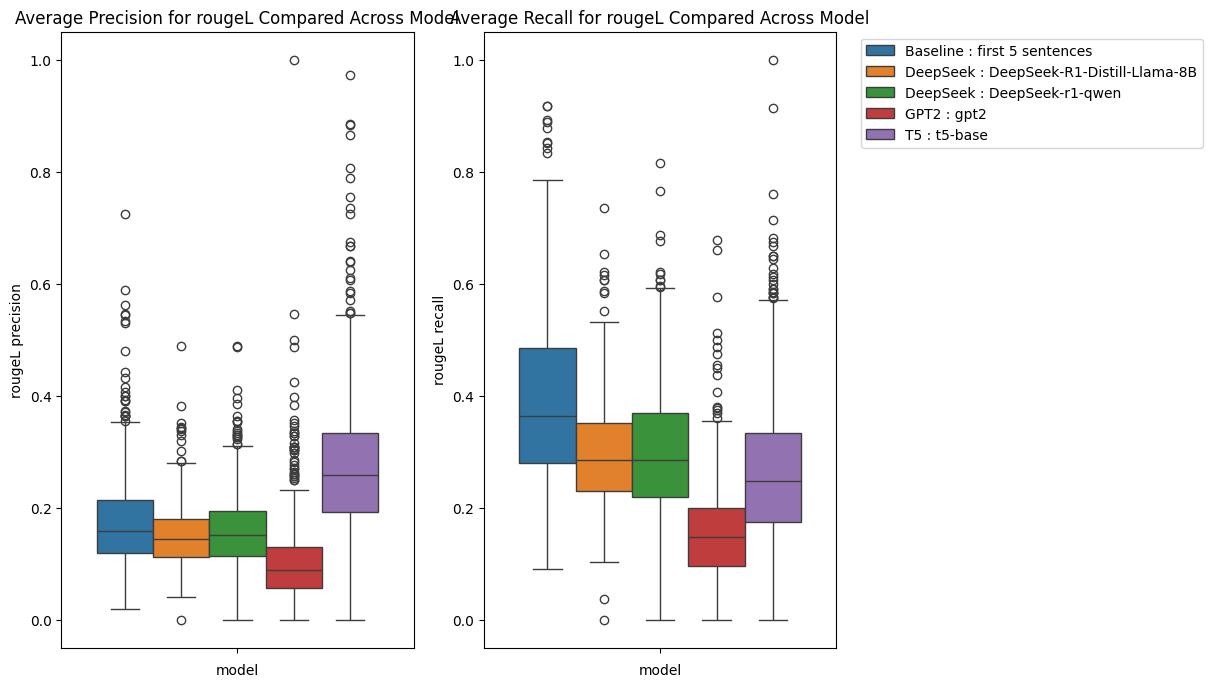

In [6]:
graph_precision_and_recall(results_df, "rougeL")

### Rouge2
* Overlap of bigrams between reference summary and model generated summaries

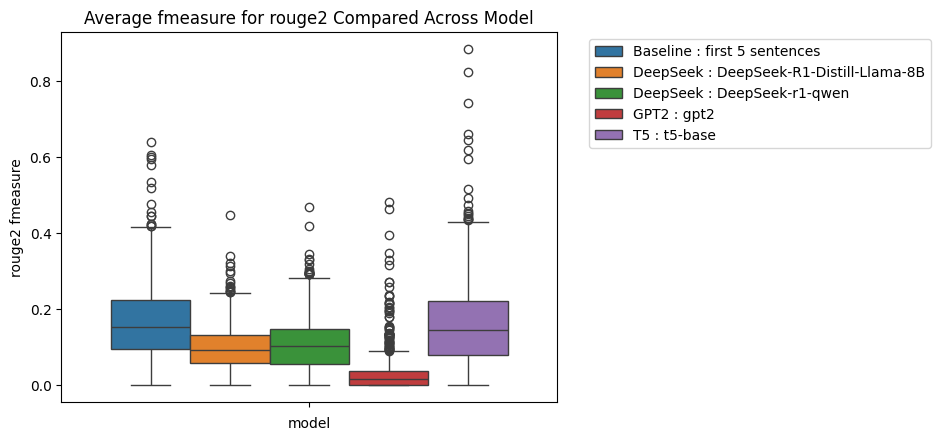

In [7]:
graph_fmeasure(results_df, "rouge2")

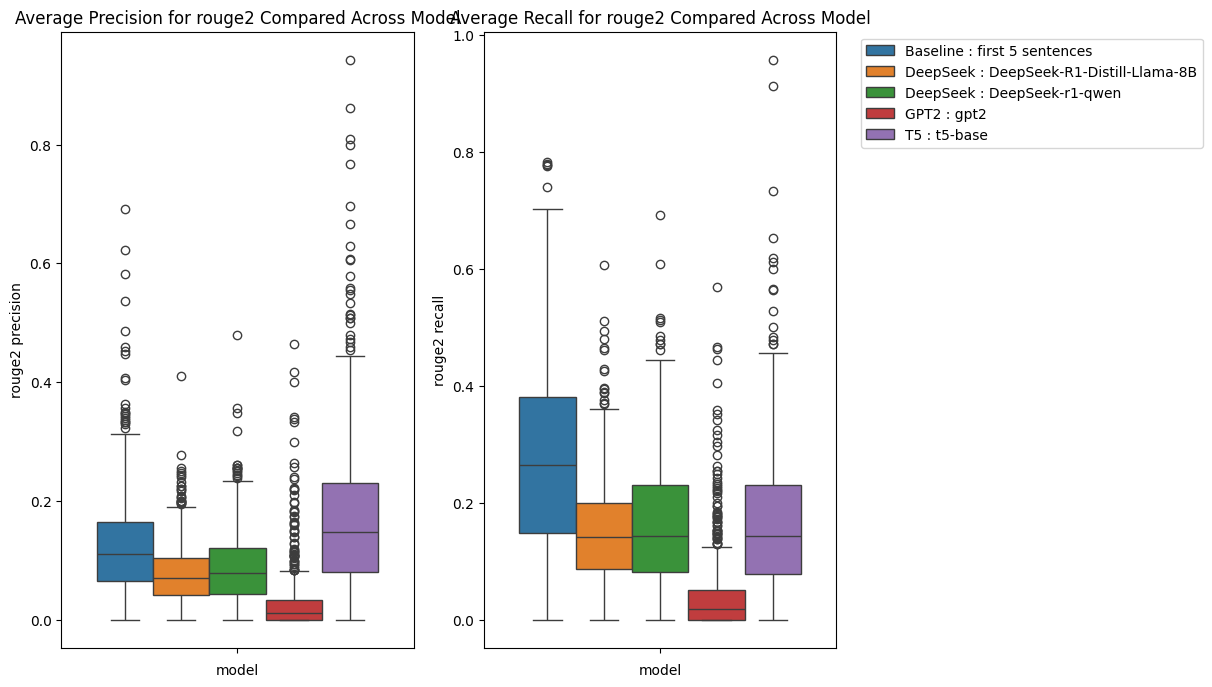

In [8]:
graph_precision_and_recall(results_df, "rouge2")

### Rouge3
* Overlap of trigrams between reference summary and model generated summaries

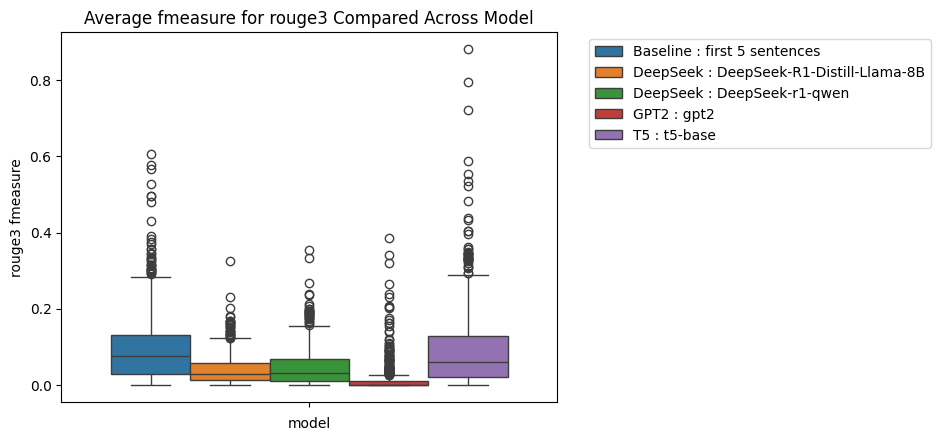

In [9]:
graph_fmeasure(results_df, "rouge3")

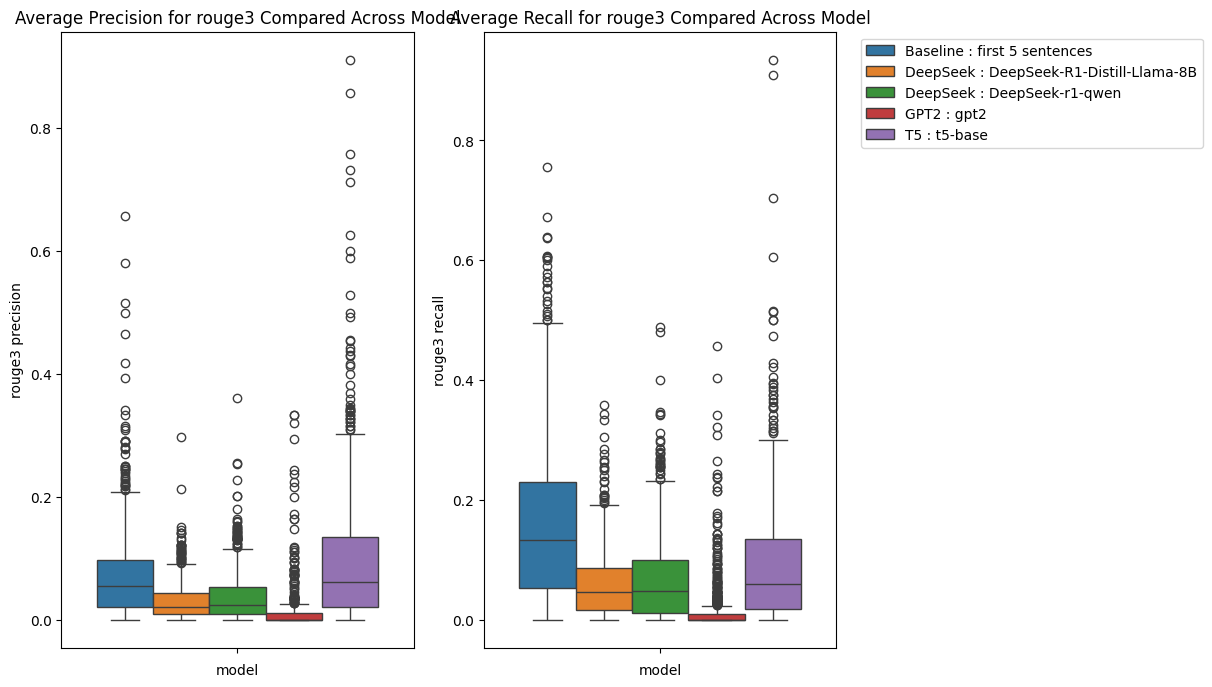

In [10]:
graph_precision_and_recall(results_df, "rouge3")

## Model Summaries - Qualitative
* Outputs the reference summary, and each generated summary (including baseline) for a sample of articles. 
* Does not output the source article for each sample, but source article can be reference using the article id in last cell.

In [36]:
df = load_df()
summary_subsample = df.sample(n=35, random_state=38)

In [54]:
# read random summary samples across models
i=1
for _, row in summary_subsample.iterrows():
    print(f"sample {i}")
    article_id = row['id']
    sum_df = results_df[results_df["article_id"]==article_id]
    sum_df = sum_df.sort_values(by="rougeL_fmeasure", ascending=False)
    print(f"Article id: {article_id}")
    print(f"REFERENCE SUMMARY: {row['highlights']}")
    print(" ")
    print("GENERATED SUMMARIES:")
    for _, row in sum_df.iterrows():
        print("-----")
        print(f"MODEL: {row['model']}")
        print(f"SUMMARY: {row['model_summaries']}")
        print("")
        print(f"F-MEASURE SCORES: RougeL {round(row['rougeL_fmeasure'],3)} Rouge2 {round(row['rouge2_fmeasure'],3)} Rouge3 {round(row['rouge3_fmeasure'],3)}")
        print("")
    print("===============================================================================================")
    i+=1


In [53]:
# # output article
article_id = "ARTICLE ID"
text = summary_subsample[summary_subsample['id']==article_id].article.iloc[0]
print(text)